# 正则化逻辑回归

## 数据查看
1. 完成对第二节数据的练习
2. 为下面的正则化逻辑回归做数据准备


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [66]:
path = 'https://raw.githubusercontent.com/kevinzhang0216/Coursera-ML-AndrewNg-Notes/master/code/ex2-logistic%20regression/ex2data2.txt'
data = pd.read_csv(path, header = None, names = ['Test 1', 'Test 2', 'Accepted'])
data.describe()
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


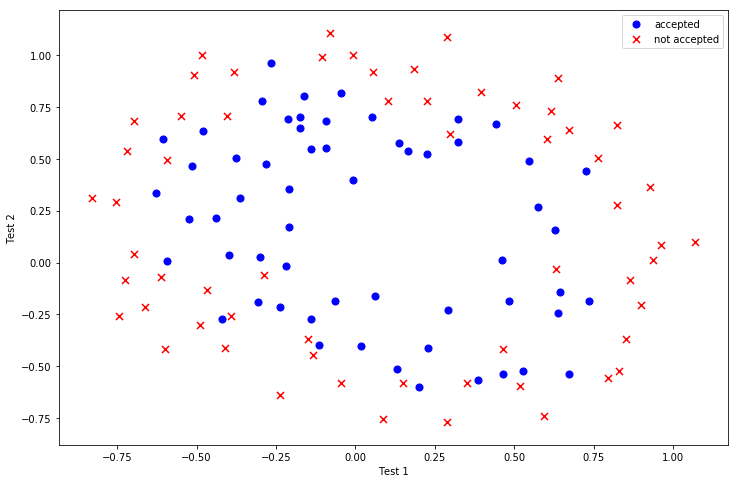

In [67]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], c = 'b', s = 50, marker = 'o', label = 'accepted') 
ax.scatter(negative['Test 1'], negative['Test 2'], c = 'r', s = 50, marker = 'x', label = 'not accepted') 
ax.legend()
ax.set_xlabel('Test 1')
ax.set_ylabel('Test 2')
plt.show()

## feature_mapping


In [0]:
'''
funtion ： featuremapping
input :    test1, test2 ,deg
ouput :    data_feature_map
'''

def featuremapping(test1, test2, deg, data):
  for i in range(0, deg+1, 1):
     for j in range(0, deg+1-i, 1):
        data['F' + str(i) + str(j)] = np.power(test1, i) * np.power(test2, j)
  return data

In [69]:
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [70]:
data = featuremapping(data['Test 1'], data['Test 2'], 6, data)
# data2.drop('Test 1', axis=1, inplace=True)
# data2.drop('Test 2', axis=1, inplace=True)
# data2.drop('Accepted', axis=1, inplace=True)
data.head()

,Test 1,Test 2,Accepted,F00,F01,F02,F03,F04,F05,F06,F10,F11,F12,F13,F14,F15,F20,F21,F22,F23,F24,F30,F31,F32,F33,F40,F41,F42,F50,F51,F60
0,0.051267,0.69956,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,0.017551,0.012278,0.008589,0.002628,0.001839,0.001286,0.000900,0.000629,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,-0.092742,0.68494,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,-0.029801,-0.020412,-0.013981,0.008601,0.005891,0.004035,0.002764,0.001893,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,-0.213710,0.69225,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,-0.070895,-0.049077,-0.033973,0.045672,0.031616,0.021886,0.015151,0.010488,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,-0.375000,0.50219,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,-0.047494,-0.023851,-0.011978,0.140625,0.070620,0.035465,0.017810,0.008944,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,-0.513250,0.46564,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,-0.051818,-0.024128,-0.011235,0.263426,0.122661,0.057116,0.026596,0.012384,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


## CostFuction

In [0]:
# 定义sigmoid函数
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [0]:
def reg_cost(theta, X, y, l=1):
  # 矩阵化
  theta = np.matrix(theta)
  X = np.matrix(X)
  y = np.matrix(y)
  theta_n = theta[1:]
  
  fisrt = np.multiply(-y, np.log(sigmoid(X * theta.T)))
  second = np.multiply((1-y), np.log(1 - sigmoid(X * theta.T)))
  cost1 = np.sum(fisrt - second)/len(X)   
  #cost2 = l * np.sum(np.power(theta_n, 2)) / len(X) / 2
  cost2 = 0
  return cost1 + cost2
  

In [0]:
# 数据预处理
cols = data.shape[1]
y = data.iloc[:, 2 : 3]
X = data.iloc[:, 3 :cols]
X = np.array(X)
y = np.array(y)
theta = np.zeros(X.shape[1])
# 注意y要变为array格式


In [84]:
reg_cost(theta, X, y)

0.6931471805599454

## 梯度的实现

In [0]:
'''
fuction : reg_gradient
input   : theta, X, y, l
output  : grad type: array
'''
def reg_gradient(theta, X, y, l = 1):
  # 矩阵化
  theta = np.matrix(theta)
  X = np.matrix(X)
  y = np.matrix(y)
  grad = np.zeros(X.shape[1])
  # 计算输出
  error = sigmoid(X * theta.T) - y  
  for i in range( X.shape[1]):
    if i == 0:
      grad[i] = np.sum(np.multiply(error, X[:, i])) / len(X) 
    else :
      grad[i] = np.sum(np.multiply(error, X[:, i])) / len(X)  + l * theta[:,i] / len(X)
  return grad   


In [102]:
reg_gradient(theta, X, y)

array([8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
       3.93028171e-02, 3.10079849e-02, 3.87936363e-02, 1.87880932e-02,
       1.15013308e-02, 8.19244468e-03, 3.09593720e-03, 4.47629067e-03,
       1.37646175e-03, 5.03446395e-02, 7.32393391e-03, 1.28600503e-02,
       5.83822078e-03, 7.26504316e-03, 1.83559872e-02, 2.23923907e-03,
       3.38643902e-03, 4.08503006e-04, 3.93486234e-02, 4.32983232e-03,
       6.31570797e-03, 1.99707467e-02, 1.09740238e-03, 3.10312442e-02])

## 拟合参数

In [103]:
import scipy.optimize as opt
res = opt.minimize(fun=reg_cost, x0=theta, args=(X, y), method='Newton-CG', jac=reg_gradient)
res

     fun: 0.4624177546605428
     jac: array([ 7.23953726e-05, -5.54516318e-05,  3.37585915e-05,  7.56509708e-05,
        1.87572379e-06,  3.73404787e-05, -1.72844020e-05, -1.77193970e-06,
        8.77627677e-05, -5.89170896e-05,  1.71174159e-05, -2.84256098e-05,
        6.01707625e-07, -1.08751184e-05, -7.16531329e-05, -5.83108710e-05,
       -1.10413797e-05, -2.33777589e-05,  5.60420455e-05, -2.25772711e-05,
       -3.88241647e-05, -1.74017156e-05, -3.93670928e-05, -4.75305670e-05,
       -3.24256902e-05,  4.27004793e-05, -2.31761455e-05, -2.97558772e-05])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 22
    nhev: 0
     nit: 3
    njev: 47
  status: 2
 success: False
       x: array([ 1.27352459,  1.17770935, -1.4293272 , -0.16833564, -1.19437523,
       -0.45449523, -0.92858274,  0.62398716, -0.90970573, -0.36355438,
       -0.27327134, -0.29823304, -0.14390975, -2.01895636, -0.37114595,
       -0.6210731 , -0.27848616, -0.32959214,  0

In [115]:
X.shape, res.x.shape, y.shape

((118, 28), (28,), (118, 1))

## 预测

In [0]:
def predict(X, theta):
  prob = sigmoid(X @ theta)
  return (prob > 0.5).astype(int)

In [126]:
from sklearn.metrics import classification_report
final_theta = res.x
print(classification_report(y, predict(X, final_theta)))


              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



## 决策边界
待增加

In [0]:
def draw_boundary(power, l):
#     """
#     power: polynomial power for mapped feature
#     l: lambda constant
#     """
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)
    path = 'https://raw.githubusercontent.com/kevinzhang0216/Coursera-ML-AndrewNg-Notes/master/code/ex2-logistic%20regression/ex2data2.txt'    
    df = pd.read_csv( path, names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

In [0]:
def feature_mapped_logistic_regression(power, l):
#     """for drawing purpose only.. not a well generealize logistic regression
#     power: int
#         raise x1, x2 to polynomial power
#     l: int
#         lambda constant for regularization term
#     """
    path = 'https://raw.githubusercontent.com/kevinzhang0216/Coursera-ML-AndrewNg-Notes/master/code/ex2-logistic%20regression/ex2data2.txt'  
    df = pd.read_csv(path, names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=reg_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=reg_gradient)
    final_theta = res.x

    return final_theta

In [0]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord.as_matrix() @ theta

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10, decision.f01
#寻找决策边界函数

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


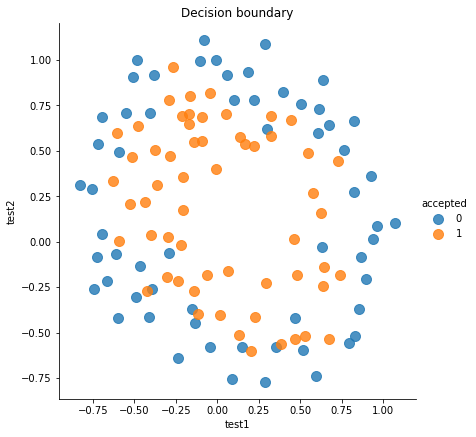

In [143]:
import seaborn as sns
draw_boundary(power=6, l=1)

In [0]:
def get_y(df):#读取标签
#     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])#df.iloc[:, -1]是指df的最后一列

In [0]:
def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""
    # data = {}
    # # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)